In [1]:
import tensorflow as tf  # pip install tensorflow
import cv2  # pip install opencv-python
import os
import matplotlib.pyplot as plt  # pip install matplotlib
import numpy as np  # pip install numpy


In [2]:
img_array = cv2.imread("C:/Users/ASBIKA/Desktop/AIPROJECT/Train_Dataset/Open_Eyes/s0001_01831_0_1_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

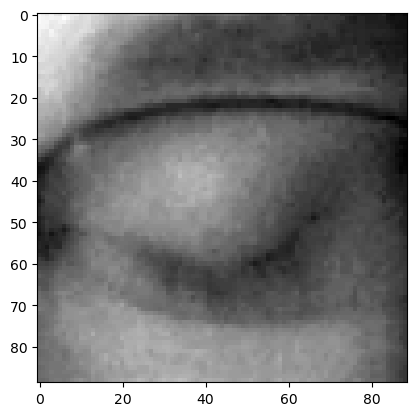

In [5]:
plt.imshow(img_array, cmap="gray")
plt.show()


In [6]:
img_array.shape

(89, 89)

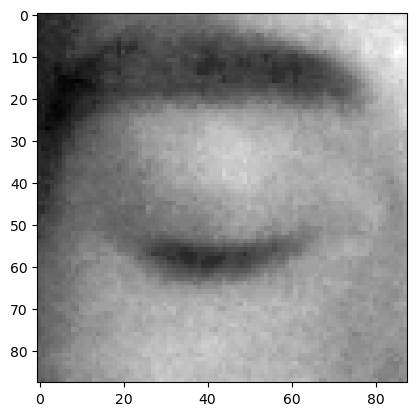

In [8]:
Datadirectory = "C:/Users/ASBIKA/Desktop/AIPROJECT/Train_Dataset"##
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


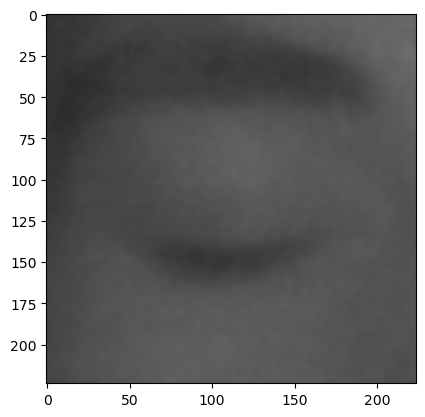

In [9]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [10]:
##Reading all the images and converting them into an array for data and labels

training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(img_array_rgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [11]:
print(len(training_Data))

0


In [12]:
import random

In [13]:
random.shuffle(training_Data)

In [54]:
X = []
y = []

In [55]:
for features,label in training_Data:
     X.append(features)
     y.append(label)

X = np.array(X).reshape(-1,img_size, img_size, 3)  
 

In [56]:
X.shape

(4000, 224, 224, 3)

In [57]:
#normalize the data
X=X/255.0; #we are normalizing it

In [58]:
Y = np.array(y)

In [59]:
import pickle

In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [22]:
base_input = model.layers[0].input ##input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [27]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

113/113 [==============================] - 849s 7s/step - loss: 0.1106 - accuracy: 0.9672 - val_loss: 0.2609 - val_accuracy: 0.8875


In [29]:
new_model.save('my_model2.h5')

In [17]:
from tensorflow.keras.models import load_model

new_model = load_model('C:/Users/ASBIKA/Desktop/AIPROJECT/my_model2.h5')


In [18]:
img_array = cv2.imread('C:\\Users\\ASBIKA\\Desktop\\AIPROJECT\\Test_Dataset\\Open_Eyes\\s0012_04895_0_0_1_0_0_03.png', cv2.IMREAD_GRAYSCALE)


In [19]:
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [20]:

X_input = np.array(new_array).reshape(1,img_size, img_size,3)


In [21]:
X_input.shape

(1, 224, 224, 3)

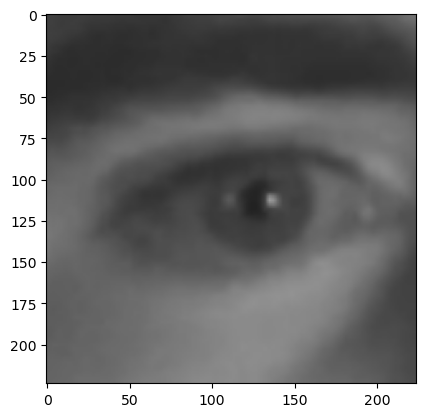

In [22]:
plt.imshow(new_array)

In [23]:
X_input = X_input/255.0

In [24]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 864ms/step


In [25]:
prediction

array([[0.9999892]], dtype=float32)

In [26]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [27]:
eye_cascade = cv2.Cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [28]:
img = cv2.imread('C:\\Users\\ASBIKA\\Desktop\\AIPROJECT\\Capture2.PNG')

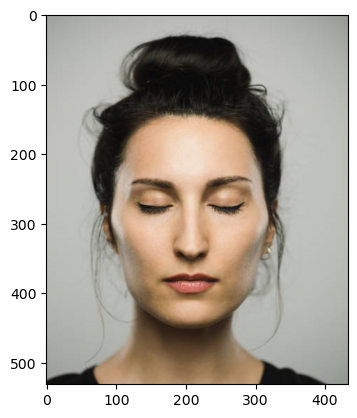

In [29]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [32]:
for(x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)

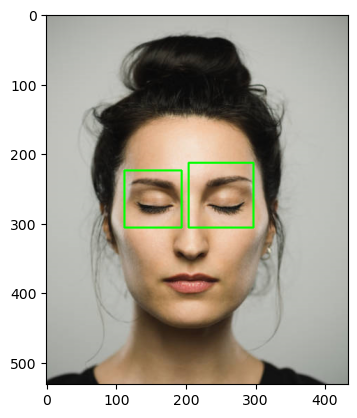

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [34]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes are not detected")
  else:
    for (ex,ey,ew,eh) in eyess:
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]


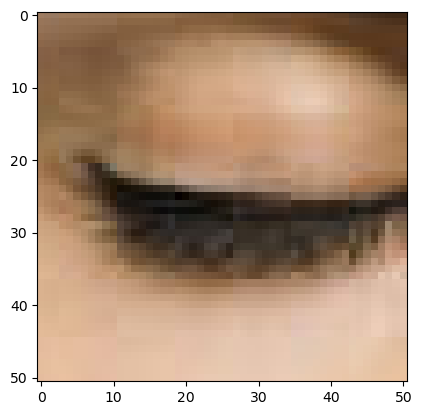

In [35]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [36]:
eyes_roi.shape

(51, 51, 3)

In [37]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [38]:
final_image.shape

(1, 224, 224, 3)

In [39]:
new_model.predict(final_image)


1/1 [==============================] - 0s 73ms/step


array([[0.00864167]], dtype=float32)

In [41]:
import winsound
import time
import numpy as np
import cv2

frequency = 2500
duration = 1000

# Load the face cascade classifier
face_cascade_db = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Open the webcam
cap = cv2.VideoCapture(0)
counter = 0
start_time = time.time()

font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret, frame = cap.read()

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    face = face_cascade_db.detectMultiScale(gray, 1.1, 19)

    for (x, y, w, h) in face:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Extract the region of interest (face) from the frame
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

        final_image1 = cv2.resize(eyes_roi, (224, 224))
        final_image1 = np.expand_dims(final_image1, axis=0)
        final_image1 = final_image1 / 255.0

        Predictions = new_model.predict(final_image1)
        if Predictions[0] > 0.5:
            status = "Open Eyes"
            cv2.putText(frame, status, (240, 50), font, 2, (0, 0, 255), 2, cv2.LINE_4)
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            counter = counter + 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (240, 50), font, 2, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, x), (x+w, y+h), (0, 0, 255), 2)
            if counter > 10:
                seconds = int(time.time() - start_time)
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, f'{seconds} seconds', (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_4)
                winsound.Beep(frequency, duration)
                counter = 0

    # Display the frame
    cv2.imshow('Sleepy Eyes Project', frame)

    # Check for 'q' key to quit
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 80ms/step
Eyes are not detected
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 99ms/step


KeyboardInterrupt: 